# CIFAR-10 Image Classification using Convolutional Neural Networks

## Description

The CIFAR-10 dataset is a collection of 60,000 32x32 color images, with each of the images falling into one of ten different categories. These categories are: airplanes, automobiles, birds, cats, deers, dogs, frogs, horses, ships, and trucks. Using this dataset, I created a convolutional neural network to create a machine learning image classifier to classify 10,000 of the images to the correct categorical label. 

## Code

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [22]:
# Load CIFAR-10 dataset from Keras
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [23]:
# Implementing One-Hot Encoding for categorical data
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [5]:
# Model
from keras import layers
model = keras.Sequential([
    layers.Conv2D(64, 7, activation = 'relu', input_shape = (32, 32, 3)),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size = (2, 2), strides = 2),

    
    layers.Conv2D(128, 3, activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size = (2, 2), strides = 2),

    
    layers.Conv2D(256, 3, activation = 'relu'),
    layers.BatchNormalization(),
    layers.MaxPool2D(pool_size = (2, 2), strides = 2),
    
    layers.Flatten(),
    layers.Dropout(0.5),
    
    layers.Dense(10, activation = 'softmax'),
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        9472      
                                                                 
 batch_normalization (Batch  (None, 26, 26, 64)        256       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 batch_normalization_1 (Bat  (None, 11, 11, 128)       512       
 chNormalization)                                                
                                                      

In [6]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

CIFAR = model.fit(x_train, y_cat_train, batch_size=32, epochs=25, validation_split=0.2, callbacks=[EarlyStopping(monitor='loss', patience=3)])

Epoch 1/25
1250/1250 [==============================] - 30s 24ms/step - loss: 1.9887 - accuracy: 0.3565 - val_loss: 1.7823 - val_accuracy: 0.3693
Epoch 2/25
1250/1250 [==============================] - 30s 24ms/step - loss: 1.4341 - accuracy: 0.4945 - val_loss: 1.8204 - val_accuracy: 0.4034
Epoch 3/25
1250/1250 [==============================] - 30s 24ms/step - loss: 1.2674 - accuracy: 0.5534 - val_loss: 1.4011 - val_accuracy: 0.5085
Epoch 4/25
1250/1250 [==============================] - 30s 24ms/step - loss: 1.1693 - accuracy: 0.5886 - val_loss: 1.2728 - val_accuracy: 0.5493
Epoch 5/25
1250/1250 [==============================] - 29s 24ms/step - loss: 1.0788 - accuracy: 0.6238 - val_loss: 1.0995 - val_accuracy: 0.6209
Epoch 6/25
1250/1250 [==============================] - 30s 24ms/step - loss: 1.0044 - accuracy: 0.6507 - val_loss: 1.0848 - val_accuracy: 0.6204
Epoch 7/25
1250/1250 [==============================] - 30s 24ms/step - loss: 0.9388 - accuracy: 0.6710 - val_loss: 1.0767 -

## Evaluation

Train accuracy: 84.95399951934814


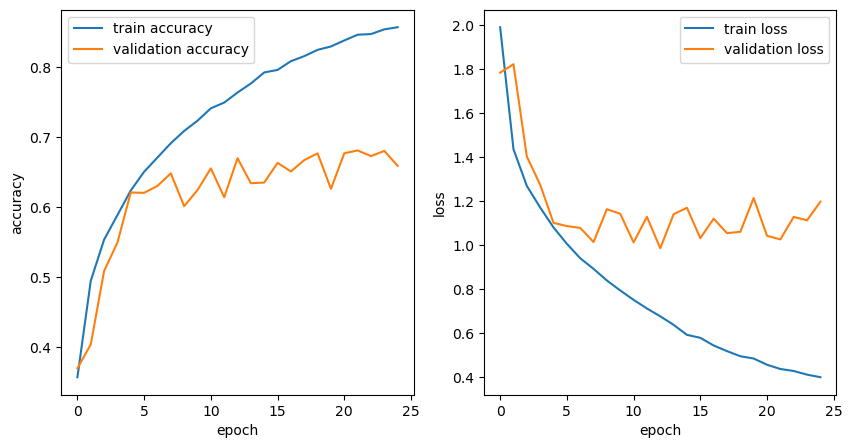

In [45]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(CIFAR.history['accuracy'], label='train accuracy')
plt.plot(CIFAR.history['val_accuracy'], label='validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(CIFAR.history['loss'], label='train loss')
plt.plot(CIFAR.history['val_loss'], label='validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

loss, acc = model.evaluate(x_train, y_cat_train, verbose=0)
print("Train accuracy:", acc * 100)

In order to see the improvement of the model during training, I plotted out the training and validation accuracy and loss after each epoch. From the graph, we can see that although the model had a lower training loss and was increasing in accuracy after each epoch in training, these improvements started to diverge as the accuracy and loss stopped improving at around the fifth epoch. This of course meant that the model began overfitting to the training data and was failing to properly classify unseen data and ended up with a with a final test accuracy of 65%.

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred))
loss, acc = model.evaluate(x_test, y_cat_test, verbose=0)
print("Test accuracy:", acc * 100)

313/313 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

           0       0.70      0.68      0.69      1000
           1       0.79      0.78      0.78      1000
           2       0.65      0.49      0.56      1000
           3       0.48      0.54      0.51      1000
           4       0.67      0.59      0.63      1000
           5       0.72      0.41      0.53      1000
           6       0.76      0.73      0.75      1000
           7       0.74      0.69      0.72      1000
           8       0.62      0.81      0.70      1000
           9       0.57      0.86      0.69      1000

    accuracy                           0.66     10000
   macro avg       0.67      0.66      0.65     10000
weighted avg       0.67      0.66      0.65     10000

Test accuracy: 65.90999960899353


313/313 [==============================] - 2s 6ms/step


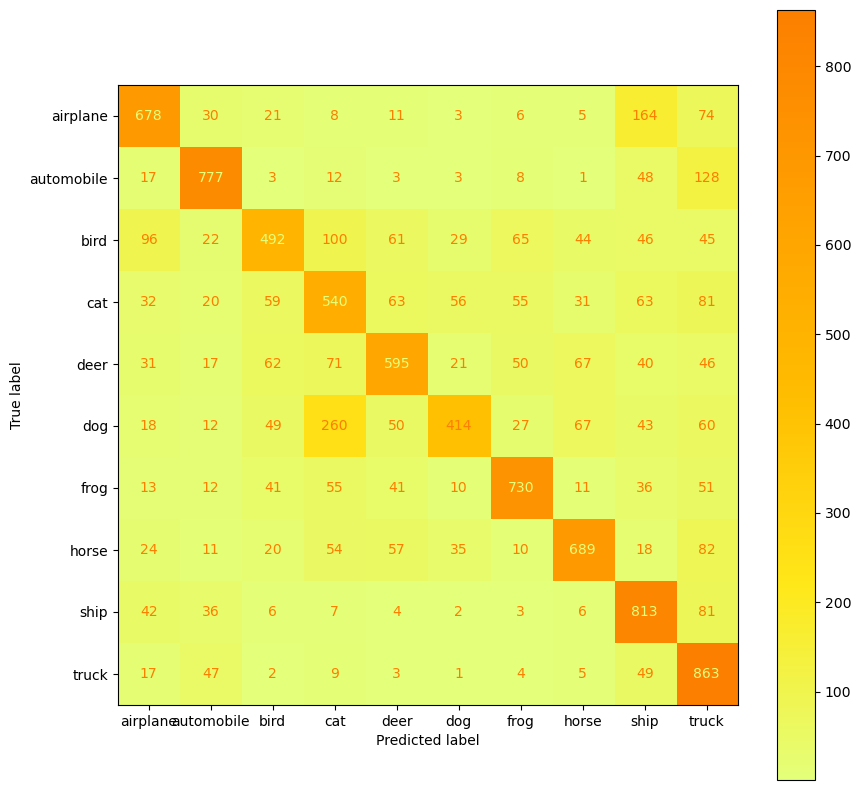

In [48]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10, 10))
mat = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
mat = mat.plot(ax=ax,cmap='Wistia')
plt.show()

From the confusion matrix of the true and predicted labels, it is clear that dogs were the class most often misclassified, followed by birds and then cats. By looking at the misclassifications, we can get an insight on some of the features from each class that the neural network might have picked up on and used to make a classification. For example, the model most often misclassified dogs as cats, which is understandable as they are both four-legged animals with similar body shapes. As well as this, the model also often misclassified airplanes to be birds, which could be due to their similarities of having wings, but it did not misclassify often in the other direction. Curiously, it also mixed up ships, trucks, automobiles, and airplanes, all of which are metallic man-made objects, This could be due to similar colors of each object. 